In [26]:
# AEC-LMS

import numpy as np
import librosa
import soundfile as sf
import pyroomacoustics as pra
import os

def lms(x, d, N = 4, mu = 0.1):
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        e_n = d[n] - np.dot(u, w)
        w = w + mu * e_n * u
        e[n] = e_n
    return e

def create_sim_sound(x, v):
    rt60_tgt = 0.08
    room_dim = [2, 2, 2]
    e_absorption, max_order = pra.inverse_sabine(rt60_tgt, room_dim)
    room = pra.ShoeBox(room_dim, fs = sr, materials = pra.Material(e_absorption), max_order = max_order)
    room.add_source([1.5, 1.5, 1.5])
    room.add_microphone([0.1, 0.5, 0.1])
    room.compute_rir()
    rir = room.rir[0][0]
    #rir = rir[np.argmax(rir):]
    y = np.convolve(x, rir)
    scale = np.sqrt(np.mean(x**2)) / np.sqrt(np.mean(y**2))
    y = y*scale
    
    L = max(len(y), len(v))
    y = np.pad(y, [0, L - len(y)])
    v = np.pad(v, [L - len(v), 0])
    x = np.pad(x, [0, L - len(x)])
    d = v + y
    
    return x, d, y
if __name__ == '__main__':
    x_org, sr = librosa.load(r'.\female.wav', sr = 16000)
    v_org, sr = librosa.load(r'.\male.wav', sr = 16000)
    
    x, d, y = create_sim_sound(x_org, v_org)
    
    e = lms(x, d, N = 128, mu = 0.1)
    
    out_res_dir = './res_7/'
    os.makedirs(out_res_dir, exist_ok = True)
    
    sf.write('%sx.wav'%(out_res_dir), x, sr, subtype = 'PCM_16')
    sf.write('%sd.wav'%(out_res_dir), d, sr, subtype = 'PCM_16')
    sf.write('%sy.wav'%(out_res_dir), y, sr, subtype = 'PCM_16')
    sf.write('%sx_org.wav'%(out_res_dir), x_org, sr, subtype = 'PCM_16')
    sf.write('%sv_org.wav'%(out_res_dir), v_org, sr, subtype = 'PCM_16')
    sf.write('%slms.wav'%(out_res_dir), e, sr, subtype = 'PCM_16')

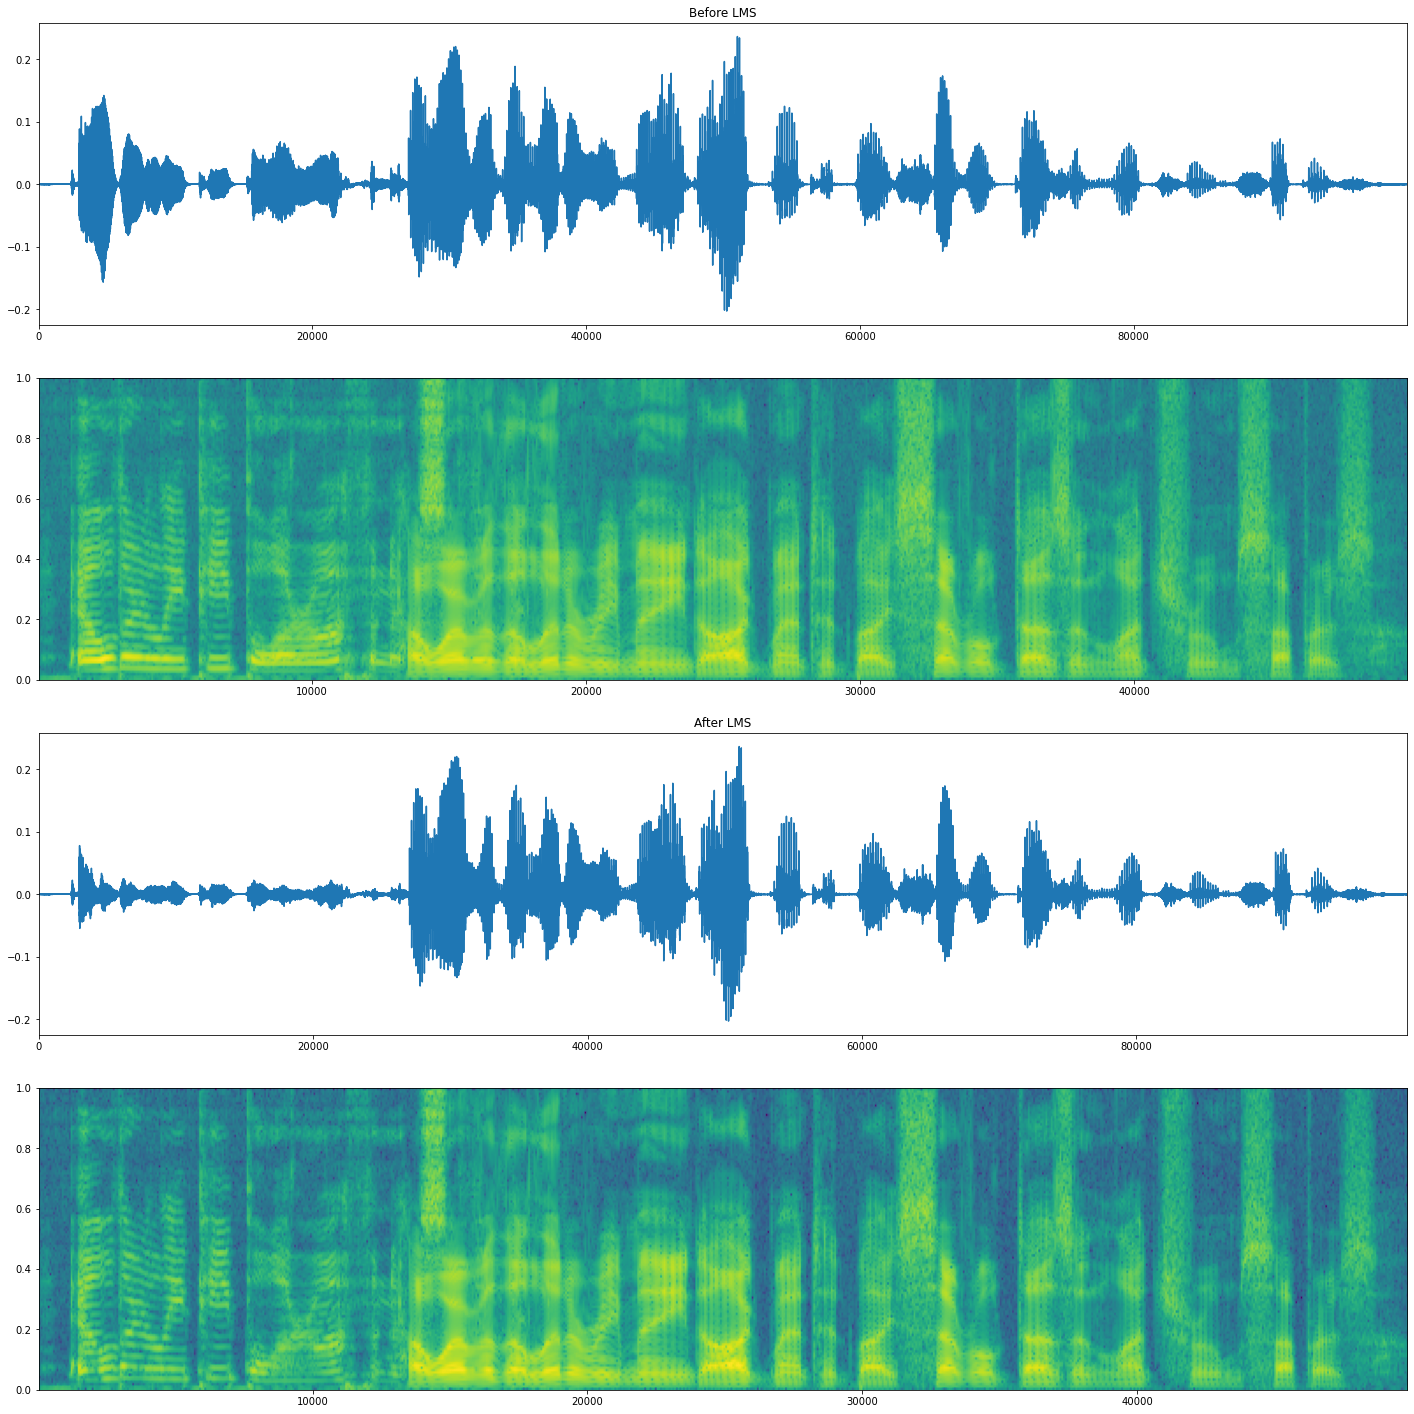

In [32]:
import matplotlib.pyplot as plt

before_lms = './res_6/d.wav'
after_lms = './res_6/lms.wav'
before_lms_wav = sf.read(before_lms)[0]
after_lms_wav = sf.read(after_lms)[0]

plt.figure(figsize = (20, 20))
plt.subplot(411)
plt.plot(before_lms_wav)
plt.xlim((0, len(before_lms_wav)))
plt.title('Before LMS')
plt.subplot(412)
plt.specgram(before_lms_wav)
plt.subplot(413)
plt.plot(after_lms_wav)
plt.xlim((0, len(after_lms_wav)))
plt.title('After LMS')
plt.subplot(414)
plt.specgram(after_lms_wav)
plt.tight_layout(pad = 2, w_pad = 2)
plt.savefig('./before_after_lms_comp.png', dpi = 400)
plt.show()


In [ ]:
# -*- coding:utf-8 -*-
# Author : Younger Huang
# Date : 2023.10.25
# AEC-LMS

import numpy as np
import librosa
import soundfile as sf
import pyroomacoustics as pra
import os

def create_sim_sound(x, v):
    rt60_tgt = 0.08
    room_dim = [2, 2, 2]
    e_absorption, max_order = pra.inverse_sabine(rt60_tgt, room_dim)
    room = pra.ShoeBox(room_dim, fs = sr, materials = pra.Material(e_absorption), max_order = max_order)
    room.add_source([1.5, 1.5, 1.5])
    room.add_microphone([0.1, 0.5, 0.1])
    room.compute_rir()
    rir = room.rir[0][0]
    #rir = rir[np.argmax(rir):]
    y = np.convolve(x, rir)
    scale = np.sqrt(np.mean(x**2)) / np.sqrt(np.mean(y**2))
    y = y*scale
    
    L = max(len(y), len(v))
    y = np.pad(y, [0, L - len(y)])
    v = np.pad(v, [L - len(v), 0])
    x = np.pad(x, [0, L - len(x)])
    d = v + y
    
    return x, d, y

if __name__ == '__main__':
    x_org, sr = librosa.load(r'.\female.wav', sr = 16000)
    v_org, sr = librosa.load(r'.\male.wav', sr = 16000)
    x, d, y = create_sim_sound(x_org, v_org)
    out_res_dir = './res_5/'
    sf.write('%sx.wav'%(out_res_dir), x, sr, subtype = 'PCM_16')
    sf.write('%sd.wav'%(out_res_dir), d, sr, subtype = 'PCM_16')
    sf.write('%sy.wav'%(out_res_dir), y, sr, subtype = 'PCM_16')